In [35]:
import pandas as pd
from constants import OECD_COUNTRIES

In [36]:
df = pd.read_excel('WEOOct2020all.xls', engine='xlrd')

In [37]:
population_df = df[(df['Subject Descriptor'].str.match('Population', case=False, na=False))]

In [38]:
from datetime import datetime
current_year = datetime.now().year
columns_to_keep = ['Country'] + [year for year in range(current_year - 10, current_year + 1)]
decade_population_df = population_df[columns_to_keep].copy()

In [45]:
oecd_decade_population_df = decade_population_df[decade_population_df['Country'].isin(OECD_COUNTRIES)]

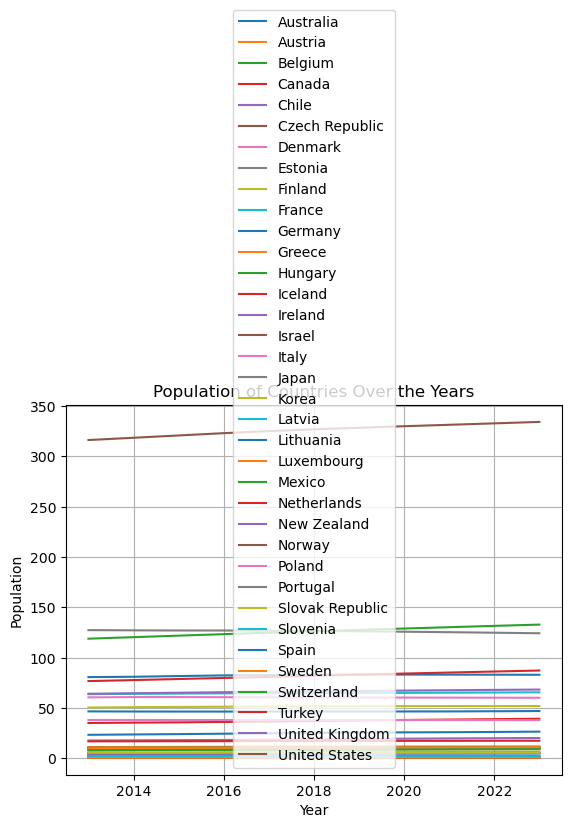

In [46]:
import matplotlib.pyplot as plt
countries = oecd_decade_population_df['Country']
years = oecd_decade_population_df.columns[1:]

for index, row in oecd_decade_population_df.iterrows():
    country_name = row['Country']
    population_values = row[years]

    plt.plot(years, population_values, label=country_name)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of Countries Over the Years')
plt.legend()
plt.grid(True)

plt.show()